In [1]:
%matplotlib inline

from pysal.lib import weights
from pysal.lib import cg as geometry
#import contextily
import geopandas
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

C:\Users\Julen Montes\Anaconda\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Pesos

## Pesos espaciales

Generamos cuadrículas

In [2]:
# Get points in a grid
l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()):
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])
    polys.append(poly)
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys)
gdf = geopandas.GeoDataFrame({'geometry': polys, 
                              'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]})

In [3]:
gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-00
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-01
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-02
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-03
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-04
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-05
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-06
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-07
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-08


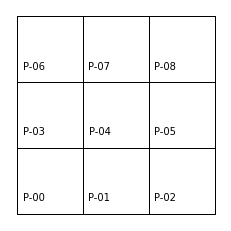

In [4]:
ax = gdf.plot(facecolor='w', edgecolor='k')
[plt.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
         [p.centroid.x-.25 for p in polys],
         [p.centroid.y-.25 for p in polys],
         [i for i in gdf['id']])]
ax.set_axis_off()
plt.show()

**Polígonos contiguos (representación dispersa)**

In [5]:
w = weights.contiguity.Rook.from_dataframe(gdf)
w.neighbors

{0: [1, 3],
 1: [0, 2, 4],
 2: [1, 5],
 3: [0, 4, 6],
 4: [1, 3, 5, 7],
 5: [8, 2, 4],
 6: [3, 7],
 7: [8, 4, 6],
 8: [5, 7]}

Dibujamos conexiones entre ellos

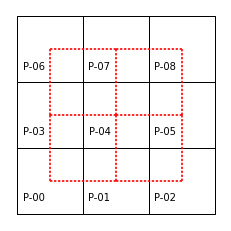

In [6]:
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
w.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax = ax)
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
[ax.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
         [p.centroid.x-.25 for p in polys],
         [p.centroid.y-.25 for p in polys],
         [i for i in gdf['id']])]
plt.gca().set_axis_off()

Polígonos contiguos (representación densa)

In [7]:
pandas.DataFrame(*w.full()).astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0
4,0,1,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0
7,0,0,0,0,1,0,1,0,1
8,0,0,0,0,0,1,0,1,0


Número de vínculos

In [8]:
w.nonzero

24

**Contiguidad de la reina (uno o más vertices): Todos los vecinos**

In [9]:
w = weights.contiguity.Queen.from_dataframe(gdf)
w.neighbors

{0: [1, 3, 4],
 1: [0, 2, 3, 4, 5],
 2: [1, 4, 5],
 3: [0, 1, 4, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7, 8],
 5: [1, 2, 4, 7, 8],
 6: [3, 4, 7],
 7: [3, 4, 5, 6, 8],
 8: [4, 5, 7]}

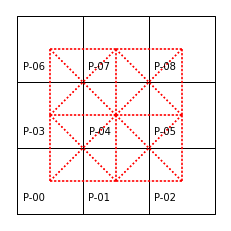

In [10]:
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
w.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
[ax.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
         [p.centroid.x-.25 for p in polys],
         [p.centroid.y-.25 for p in polys],
         [i for i in gdf['id']])]
plt.gca().set_axis_off()

Fuerza del vínculo

In [11]:
w.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

Número de vecinos para cada observación

In [12]:
w.cardinalities

{0: 3, 1: 5, 2: 3, 3: 5, 4: 8, 5: 5, 6: 3, 7: 5, 8: 3}

In [13]:
w.histogram

[(3, 4), (4, 0), (5, 4), (6, 0), (7, 0), (8, 1)]

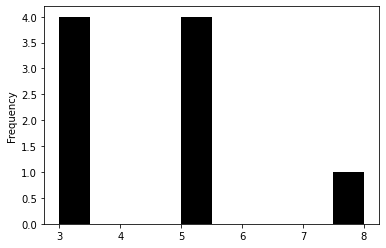

In [14]:
pandas.Series(w.cardinalities).plot.hist(color='k');

Número de combinaciones

In [15]:
w.s0

40.0

Densidad de relaciones: 100×(w.s0/w.n**2)

In [16]:
w.pct_nonzero

49.382716049382715

In [17]:
100*(w.s0/w.n**2)

49.382716049382715

## Pesos espaciales a partir de datos del mundo real 


In [18]:
san_diego_tracts = geopandas.read_file('data/sandiego_tracts.gpkg')
wq = weights.contiguity.Queen.from_dataframe(san_diego_tracts)

Grafico de relaciones de abyaciencia

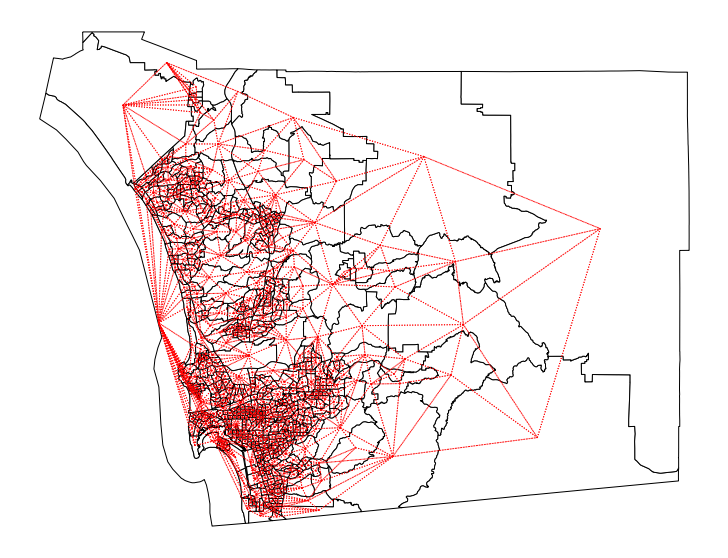

In [19]:
ax = san_diego_tracts.plot(edgecolor='k', facecolor='w',figsize=(15,10))
wq.plot(san_diego_tracts, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

Gráfico con mayor detalle

(-13040000.0, -13020000.0, 3850000.0, 3860000.0)

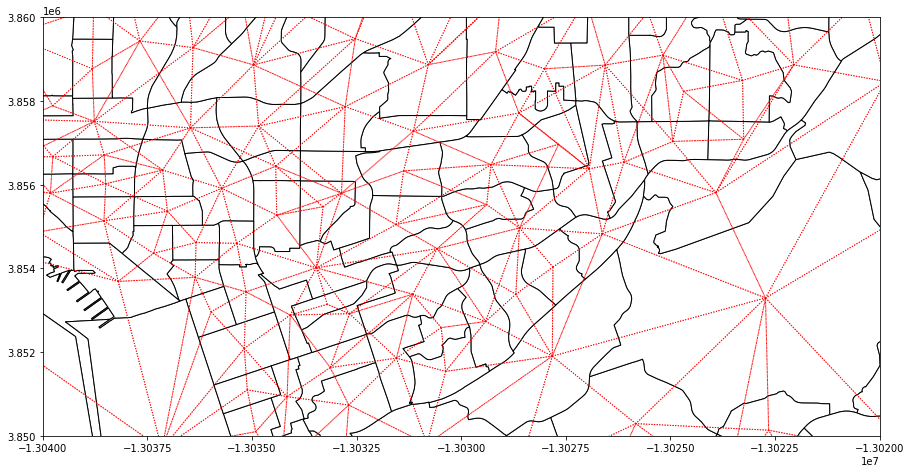

In [20]:
ax = san_diego_tracts.plot(edgecolor='k', facecolor='w',figsize=(15,10))
f,ax = wq.plot(san_diego_tracts, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.axis([-13040000,  -13020000, 3850000, 3860000])

In [21]:
print('- Número de unidades:\n',wq.n)
print('- Porcentage de pesos no iguales a zero:\n',wq.pct_nonzero)

- Número de unidades:
 628
- Porcentage de pesos no iguales a zero:
 1.018296888311899


Histograma de número de cardinalidades por polígono

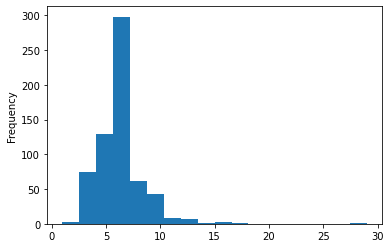

In [22]:
s = pandas.Series(wq.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

0.8722463385938578


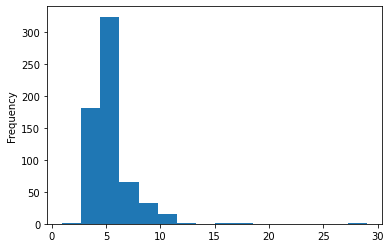

In [23]:
wr = weights.contiguity.Rook.from_dataframe(san_diego_tracts)
print(wr.pct_nonzero)
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

##  Pesos espaciales basados en distancia

### Pesos KNN

Utilizando la distancia entre centroides

In [24]:
wk4 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=4)

In [25]:
wk4.islands

[]

En este caso, cada observación tiene el mismo numero de vecinos

In [26]:
wk4.histogram

[(4, 628)]

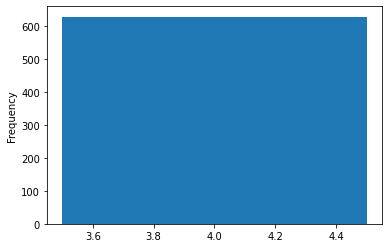

In [27]:
s = pandas.Series(wk4.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

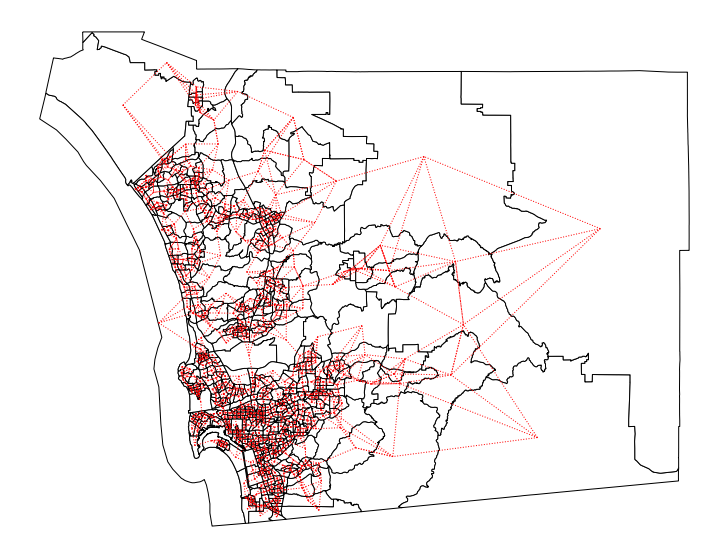

In [28]:
ax = san_diego_tracts.plot(edgecolor='k', facecolor='w',figsize=(15,10))
wk4.plot(san_diego_tracts, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

### Pesos de Kernel

En este caso, las observaciones que están cerca de una unidad tienen ponderaciones valoradas más grandes que las observaciones más distantes

Los pesos de kernel son uno de los tipos de pesos de distancia más utilizados. Reflejan el caso en el que se supone o se espera que la similitud / proximidad espacial decaiga con la distancia

Al igual que las ponderaciones KNN, las ponderaciones de Kernel se basan en distancias entre observaciones. Por defecto, si los datos de entrada son una unidad de área, usamos un punto central representativo (como el centroide) para ese polígono

In [29]:
w_kernel = weights.distance.Kernel.from_dataframe(gdf)

El ancho de banda especifica la distancia desde cada unidad focal sobre la que se aplica la función del núcleo. Para observaciones separadas por distancias mayores que el ancho de banda, los pesos se establecen en cero.

Los valores predeterminados para los núcleos son utilizar un núcleo triangular con una distancia de ancho de banda igual a la distancia máxima knn = 2 para todas las observaciones. Esto último implica un llamado ancho de banda fijo donde todas las observaciones usan la misma distancia para el corte

In [30]:
w_kernel.function

'triangular'

In [31]:
w_kernel.bandwidth[0:5]

array([[1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001]])

Aunque simple, un ancho de banda fijo no siempre es la mejor opción. Por ejemplo, en los casos en que la densidad de las observaciones varía en la región de estudio, el uso del mismo umbral en cualquier lugar dará como resultado regiones con una alta densidad de vecinos, mientras que otras con observaciones muy escasamente conectadas. En estas situaciones, se puede preferir un ancho de banda adaptativo, uno que varía según la observación y sus características. Los anchos de banda adaptables se eligen nuevamente usando una regla de vecino más cercano K. Se elige un ancho de banda para cada observación de modo que, una vez quek-se considera la observación más cercana, todas las observaciones restantes tienen peso cero

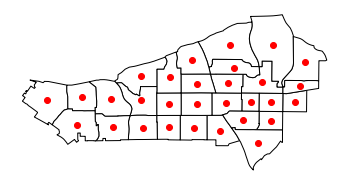

In [32]:
sub_30 = san_diego_tracts.query("sub_30 == True")
ax = sub_30.plot(facecolor='w', edgecolor='k')
sub_30.head(30).centroid.plot(color='r', ax=ax)
ax.set_axis_off()

In [33]:
w_adaptive = weights.distance.Kernel.from_dataframe(sub_30, fixed=False, k=15)
w_adaptive.bandwidth

array([[7065.74020822],
       [3577.22591841],
       [2989.74807871],
       [2891.46196945],
       [3965.08354232],
       [3406.51664073],
       [2340.12505123],
       [2390.61537944],
       [4416.16957187],
       [3483.32748924],
       [4334.31029263],
       [4596.7841045 ],
       [2489.49511137],
       [3426.23765133],
       [3113.26708955],
       [2600.23008991],
       [3897.02104953],
       [5728.47406265],
       [2353.46688048],
       [2478.90082529],
       [2753.7610919 ],
       [2996.08495302],
       [3001.30433739],
       [2980.82938619],
       [5766.77869894],
       [2989.74807871],
       [3067.49468467],
       [3001.30433739],
       [3659.16733162],
       [4125.41931166]])

[None, None]

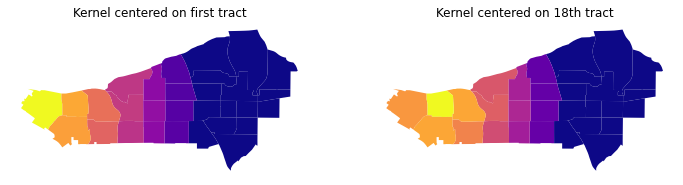

In [34]:
full_matrix, ids = w_adaptive.full() 
f,ax = plt.subplots(1,2,figsize=(12,6), subplot_kw=dict(aspect='equal'))
sub_30.assign(weight_0 = full_matrix[0]).plot("weight_0", cmap='plasma', ax=ax[0])
sub_30.assign(weight_15 = full_matrix[17]).plot("weight_15", cmap='plasma', ax=ax[1])
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
[ax_.set_axis_off() for ax_ in ax]

In [35]:
w_kernel.pct_nonzero

40.74074074074074

## Bandas de distancia y pesos híbridos

En algunos contextos, tiene sentido dibujar un círculo alrededor de cada observación y considerar como vecinas todas las demás observaciones que caen dentro del círculo. 

En la terminología GIS, esto es similar a dibujar un búfer alrededor de cada punto y realizar una operación de punto en polígono que determina si cada una de las otras observaciones están dentro del búfer. Si lo son, se les asigna una ponderación de uno en la matriz de ponderaciones espaciales, si no, reciben un cero.

In [36]:
w_bdb = weights.distance.DistanceBand.from_dataframe(gdf, 1.5, binary=True)
vars(w_bdb)

{'p': 2,
 'threshold': 1.5,
 'binary': True,
 'alpha': -1.0,
 'build_sp': True,
 'silence_warnings': False,
 'kdtree': <scipy.spatial.kdtree.KDTree at 0x228cf9e6520>,
 'data': array([[0.5, 0.5],
        [1.5, 0.5],
        [2.5, 0.5],
        [0.5, 1.5],
        [1.5, 1.5],
        [2.5, 1.5],
        [0.5, 2.5],
        [1.5, 2.5],
        [2.5, 2.5]]),
 'dmat': <9x9 sparse matrix of type '<class 'numpy.float64'>'
 	with 40 stored elements in Compressed Sparse Row format>,
 'silent_island_warning': False,
 'silent_connected_components': False,
 'transformations': {'O': {0: [1.0, 1.0, 1.0],
   1: [1.0, 1.0, 1.0, 1.0, 1.0],
   2: [1.0, 1.0, 1.0],
   3: [1.0, 1.0, 1.0, 1.0, 1.0],
   4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
   5: [1.0, 1.0, 1.0, 1.0, 1.0],
   6: [1.0, 1.0, 1.0],
   7: [1.0, 1.0, 1.0, 1.0, 1.0],
   8: [1.0, 1.0, 1.0]}},
 'neighbors': {0: [1, 3, 4],
  1: [0, 2, 3, 4, 5],
  2: [1, 4, 5],
  3: [0, 1, 4, 6, 7],
  4: [0, 1, 2, 3, 5, 6, 7, 8],
  5: [1, 2, 4, 7, 8],
  6: [3, 

In [37]:
w_bdb.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

Esto crea una ponderación de distancia binaria donde cualquier otra observación dentro de una distancia de 1,5 se considera vecino.

-----
Los pesos híbridos, también disponibles en PySAL, son matrices que ofrecen una combinación del umbral y pesos de distancia continuos truncando los pares de vecinos a aquellos separados por menos de un umbral de distancia.

Calculemos una matriz híbrida que combine pesos de distancia inversa hasta un cierto umbral y luego trunquemos los pesos a cero para todos los demás

In [38]:
w_hy = weights.distance.DistanceBand.from_dataframe(gdf, 1.5, binary=False)

Podemos inspeccionar el diccionario weights para ver los pesos, en este caso, no son solo 1 o 0, pero hay valores intermedios:

In [39]:
w_hy.weights

{0: [1.0, 1.0, 0.7071067811865475],
 1: [1.0, 1.0, 0.7071067811865475, 1.0, 0.7071067811865475],
 2: [1.0, 0.7071067811865475, 1.0],
 3: [1.0, 0.7071067811865475, 1.0, 1.0, 0.7071067811865475],
 4: [0.7071067811865475,
  1.0,
  0.7071067811865475,
  1.0,
  1.0,
  0.7071067811865475,
  1.0,
  0.7071067811865475],
 5: [0.7071067811865475, 1.0, 1.0, 0.7071067811865475, 1.0],
 6: [1.0, 0.7071067811865475, 1.0],
 7: [0.7071067811865475, 1.0, 0.7071067811865475, 1.0, 1.0],
 8: [0.7071067811865475, 1.0, 1.0]}

### Grandes distancias de círculo: Curvatura de la tierra

Es importante que el cálculo de distancias entre objetos tenga en cuenta la **curvatura de la superficie terrestre**.

Esto se puede hacer antes de calcular el objeto de pesos espaciales, **transformando las coordenadas de los puntos de datos en un sistema de referencia proyectado, en un SIG, por ejemplo.**

Si esto no es posible o conveniente, una aproximación que considere la curvatura implícita en los sistemas de referencia no proyectados (por ejemplo, longitud / latitud) puede ser una solución alternativa suficiente. PySAL proporciona dicha aproximación como parte de su funcionalidad.

---

Para ilustrar la relevancia de ignorar este aspecto por completo, examinaremos las ponderaciones basadas en la distancia para el caso de los condados del estado de Texas. Primero, calculemos un objeto KNN-4 que *ignora la curvatura de la superficie de la Tierra:*

In [40]:
texas = geopandas.read_file('data/texas/texas.shp')
knn4_bad = weights.distance.KNN.from_dataframe(texas, k=4) # ignore curvature of the earth

In [41]:
knn4_bad.histogram

[(4, 254)]

A continuación, tengamos en cuenta la curvatura. Para hacer esto, necesitamos el radio de la Tierra expresado en una métrica dada. PySAL proporciona este número tanto en millas como en kilómetros. Por el bien del ejemplo, usaremos millas:

In [42]:
radius = geometry.sphere.RADIUS_EARTH_MILES
radius

3958.755865744055

Con esta medida a mano, podemos pasarla al constructor de pesos (ya sea directamente desde un shapefile o desde a GeoDataFrame) y las distancias se expresarán en las unidades que hemos utilizado para el radious, es decir, en millas en nuestro caso:

In [43]:
knn4 = weights.distance.KNN.from_dataframe(texas, k=4, radius=radius)

In [44]:
knn4.histogram

[(4, 254)]

Al comparar los conjuntos de vecinos resultantes, vemos que ignorar la curvatura de la superficie de la Tierra puede crear pares de vecinos erróneos:

In [45]:
knn4[0]

{6: 1.0, 4: 1.0, 5: 1.0, 3: 1.0}

In [46]:
knn4_bad[0]

{6: 1.0, 4: 1.0, 5: 1.0, 13: 1.0}

## Establecer operaciones en pesos

En esta sección, exploramos cómo podemos crear nuevas matrices combinando diferentes matrices existentes. Esto es útil en contextos donde una sola regla de vecindad tiene fallas o cuando la teoría u otros principios rectores apuntan en direcciones que requieren combinar más de un solo criterio.

En este ejemplo, generaremos una combinación de los pesos de contigüidad originales y los pesos del vecino más cercano. Examinaremos dos enfoques diferentes que proporcionan la misma solución, ilustrando así el valor de las operaciones de conjuntos en PySAL

### Editar / conectar observaciones desconectadas 

Imagínese que uno de nuestros terrenos fuera una isla y no tuviera vecinos en el caso de contigüidad. Esto puede crear problemas en la analítica espacial que se basan en pesos espaciales, por lo que es una buena práctica modificar la matriz antes de usarla. El primer enfoque que adoptamos es encontrar el vecino más cercano para la observación de la isla y luego agregar este par de vecinos para extender los pares de vecinos desde el peso de contigüidad original para obtener un conjunto de pesos completamente conectado.

Asumiremos, por el bien del ejemplo, que la observación desconectada fue la número 103. Para que podamos volver a adjuntar este tramo, podemos asignarlo para que esté "conectado" a su vecino más cercano. Primero extraigamos nuestra geometría de "problema":

In [47]:
disconnected_tract = san_diego_tracts.iloc[[103]]

In [48]:
disconnected_tract

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
103,06073020019,52.6,6745.0,5545.0,3006.0,6745.0,633.0,186.0,52917.0,0.4684,...,06,073,020019,3.39755,0.230223,0.093847,0.027576,0.82209,False,"POLYGON ((-13050030.210 3912714.660, -13050026..."


Como hemos visto antes, el registro antes tenía vecinos

In [50]:
wq[103]

{160: 1.0, 480: 1.0, 98: 1.0, 324: 1.0, 102: 1.0, 107: 1.0, 173: 1.0}

Pero, para este ejemplo, asumiremos que no es así y, por lo tanto, nos encontramos en la posición de tener que crear unidades vecinas adicionales. Este enfoque no solo se aplica en el contexto de las islas. A veces, el proceso que nos interesa puede requerir que editamos manualmente los pesos para reflejar mejor las conexiones que sabemos que existen.

Conectaremos la observación a su vecino más cercano. Para hacer esto, podemos construir el gráfico KNN como lo hicimos anteriormente, pero establecido k=1, por lo que las observaciones solo se asignan a su vecino más cercano:

In [51]:
wk1 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=1)

C:\Users\Julen Montes\Anaconda\lib\site-packages\pysal\lib\weights\weights.py:170: UserWarning: The weights matrix is not fully connected. There are 153 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


En este gráfico, todas nuestras observaciones están conectadas a otra observación

In [52]:
pandas.Series(wk1.cardinalities).unique()

array([1], dtype=int64)

In [53]:
wk1.cardinalities

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

También, por supuesto, nuestro registro de interés, que está conectado al elemento 102

In [54]:
wk1.neighbors[103]

[102]

Para conectarlo en nuestra matriz inicial, necesitamos crear una copia del neighbors

In [55]:
neighbors = wr.neighbors.copy()

y luego cambiamos la entrada para la observación de la isla para incluir su vecino más cercano (102) así como actualizar 102 para tener 103 como vecino:

In [56]:
neighbors[103].append(102)
neighbors[102].append(103)
w_new = weights.W(neighbors)

In [80]:
print('102:',neighbors[102])
print('103:',neighbors[103])

102: [16, 480, 98, 103, 13, 15, 103]
103: [480, 160, 324, 102, 107, 173, 102]


### Usar unión de matrices

Un enfoque más elegante del problema de la isla hace uso del soporte de PySAL para establecer operaciones teóricas en pesos de PySAL:

In [81]:
w_fixed_sets = weights.set_operations.w_union(wr, wk1)

Es importante mencionar que este enfoque no es exactamente el mismo, al menos en principio, que el anterior. Podría ser que la observación más cercana no fuera originalmente una vecina y, en este caso, las matrices resultantes serían diferentes. Ésta es una situación rara pero teóricamente posible.

### Pesos de bloque 


Un último tipo de ponderación espacial que examinamos aquí son las **ponderaciones de bloque**.

La pertenencia a un grupo o conjunto define las relaciones con los vecinos. Los pesos de bloque **conectan cada observación en un conjunto de datos que pertenece a la misma categoría en una lista proporcionada anteriormente**. 

Por lo general, esta lista tendrá alguna relación con la geografía de las observaciones pero, técnicamente hablando, todo lo que se necesita para crear pesos de bloque es una lista de membresías. En esencia, una estructura jerárquica agrupa las observaciones individuales y asigna un valor de uno a la ponderación de todos los miembros del par del grupo, y un valor de cero a los pares que involucran observaciones que pertenecen a diferentes grupos.

Para demostrar esta clase de ponderaciones espaciales, utilizaremos el conjunto de datos del tramo para San Diego y nos centraremos en la membresía de su condado:

*Dado que toda la región de San Diego está en California, la identificación del estado es la misma en todo el conjunto de datos.

In [86]:
san_diego_tracts[['GEOID', 'state', 'county', 'tract']]

,GEOID,state,county,tract
0,06073018300,06,073,018300
1,06073018601,06,073,018601
2,06073017601,06,073,017601
3,06073019301,06,073,019301
4,06073018700,06,073,018700
...,...,...,...,...
623,06073020709,06,073,020709
624,06073020805,06,073,020805
625,06073020810,06,073,020810
626,06073021206,06,073,021206


In [85]:
w_bl = weights.util.block_weights(san_diego_tracts['county'].values, #identificador de membresía: condado
                                  ids=san_diego_tracts['GEOID'].values 
                                 )

Podemos usar pesos de bloque como un paso intermedio en análisis más complicados de vínculos espaciales. Supongamos, por ejemplo, que el investigador quisiera permitir vecinos reinas dentro de los condados, pero no extensiones en diferentes condados. Las extensiones de diferentes condados no se consideran vecinos.

Como comprobación, consideremos las dos primeras filas de la tabla anterior. Si el comando block weights ha funcionado correctamente, ambos deberían ser vecinos:

In [95]:
'06073018601' in w_bl['06073018300']

True

Podemos usar pesos de bloque como un paso intermedio en análisis más complicados de vínculos espaciales. Supongamos, por ejemplo, que el investigador quisiera permitir vecinos reinas dentro de los condados, pero no extensiones en diferentes condados. Las extensiones de diferentes condados no se consideran vecinos.

### Visualización de operaciones de conjuntos de pesos 

Terminamos el capítulo ilustrando los conceptos anteriores utilizando los 32 estados de México. Comparamos los gráficos de vecinos que resultan de los diferentes criterios utilizados para definir las relaciones de vecinos.

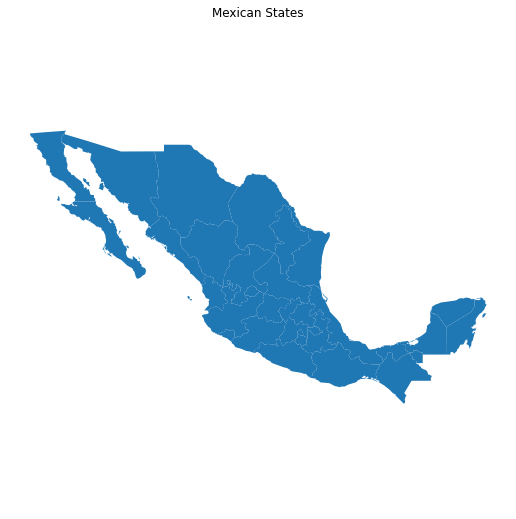

In [103]:
mx = geopandas.read_file('data/mexico/mexicojoin.shp')
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax)
ax.set_axis_off()
ax.set_title('Mexican States')
plt.axis('equal')
plt.show()

Contrastaremos la estructura de conectividad para los tres siguientes tipos de ponderaciones espaciales:

- Pesos de contigüidad de reina (Queen)

- Pesos de bloque (Block)

- Combinación de pesos Block + Queen

1) Queen

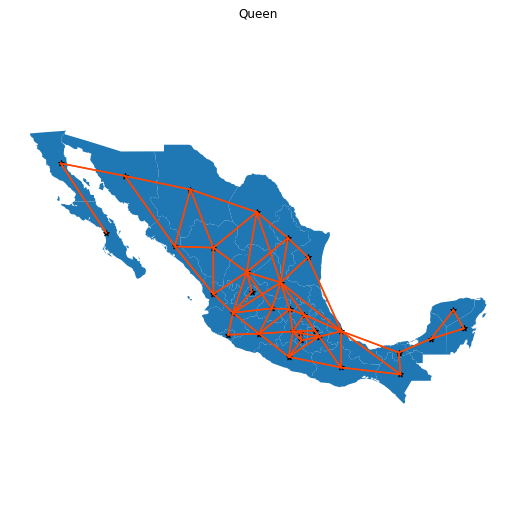

In [104]:
queen_mx = weights.contiguity.Queen.from_dataframe(mx)
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax)
queen_mx.plot(mx,edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'),  ax=ax, )
ax.set_axis_off()
ax.set_title('Queen')
plt.axis('equal')
plt.show()

2) Bloque

Para los pesos de bloque, usamos la designación oficial de regiones del gobierno federal:

[]

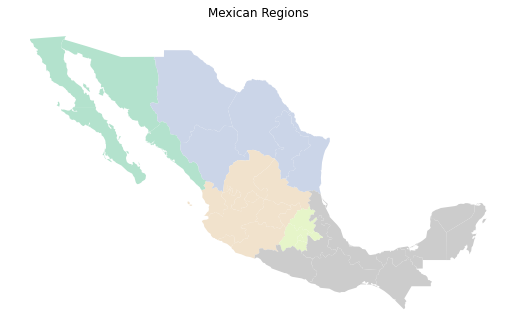

In [126]:
ax = mx.plot(column='INEGI2', categorical=True, cmap='Pastel2',figsize=(9,9))
ax.set_axis_off()
ax.set_title("Mexican Regions")
plt.plot()

In [127]:
block_mx = weights.util.block_weights(mx['INEGI2'].values)

C:\Users\Julen Montes\Anaconda\lib\site-packages\pysal\lib\weights\weights.py:170: UserWarning: The weights matrix is not fully connected. There are 5 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


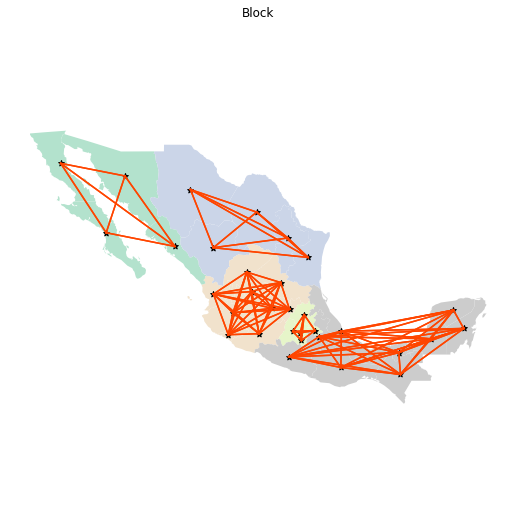

In [128]:
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
block_mx.plot(mx, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
                  node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block')
plt.axis('equal')
plt.show()

3) Combinación Block + Queen

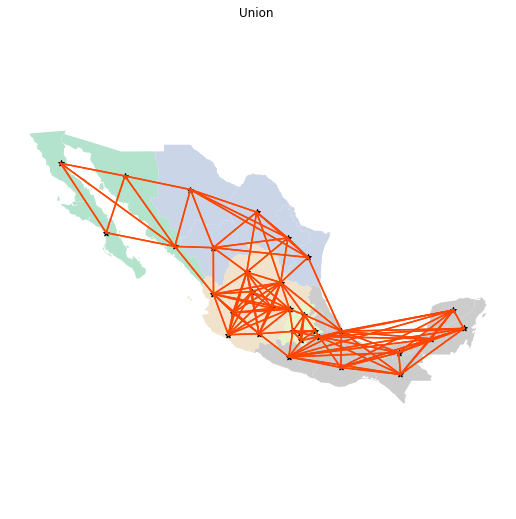

In [129]:
union_mx = weights.set_operations.w_union(block_mx, queen_mx)

f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(column='INEGI2', categorical=True, cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Union ')
plt.axis('equal')
plt.show()

Finalmente, comparamos las tres gráficas vecinas una al lado de la otra:

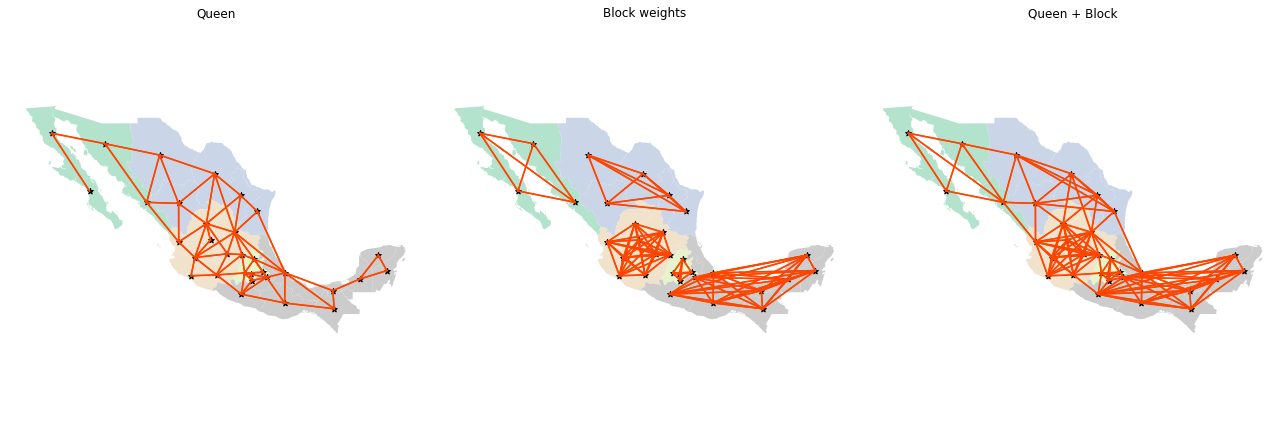

In [131]:
f, axs = plt.subplots(1, 3, figsize=(18, 6))


# Contiguity
ax = axs[0]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
queen_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen')
ax.axis('equal')

# Block
ax = axs[1]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
block_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block weights')
ax.axis('equal')

# Union
ax = axs[2]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen + Block')
plt.axis('equal')
f.tight_layout()
plt.show()


Centrándonos en los gráficos Queen y Block, existen claras distinciones entre las estructuras de conectividad. El gráfico de bloques es visualmente más denso en áreas particulares en relación con el gráfico de Queen y esto se confirma en sus medidas de dispersión:

In [132]:
block_mx.pct_nonzero

19.140625

In [133]:
queen_mx.pct_nonzero

13.4765625

Finalmente, la unión es el más denso de los tres

In [134]:
union_mx.pct_nonzero

24.0234375

# Caso de uso: detección de límites

Los pesos espaciales son omnipresentes en el análisis de patrones espaciales en los datos, ya que proporcionan un método directo para representar la estructura espacial. Sin embargo, las ponderaciones espaciales a veces son útiles por derecho propio, como cuando se examinan estructuras latentes directamente en los propios gráficos o cuando se utilizan para realizar análisis descriptivos. Un caso de uso claro que surge en el análisis de datos sociales es caracterizar discontinuidades de datos latentes . Por discontinuidad de datos , nos referimos a una frontera única (o colección de fronteras) donde los datos de una variante (o muchas variantes) de interés cambian rápidamente.

A continuación, mostraremos una forma sin modelos de identificar límites empíricos en sus datos.

Primero, consideremos el ingreso familiar promedio para nuestras secciones censales en San Diego:

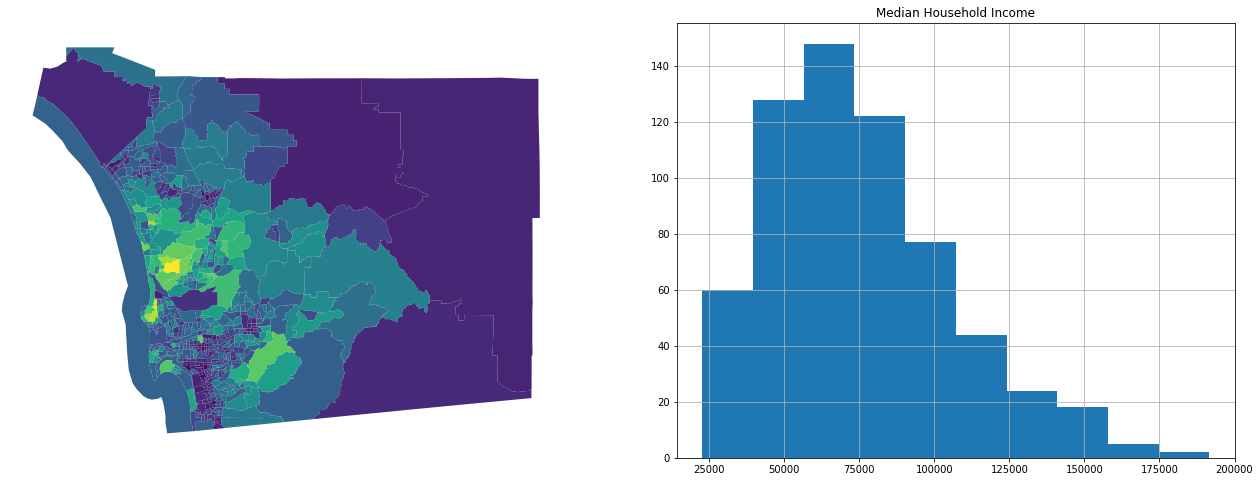

In [141]:
f,ax = plt.subplots(1,2, figsize=(22,8))
san_diego_tracts.plot('median_hh_income', ax=ax[0])
ax[0].set_aspect('equal')
ax[0].set_axis_off()
san_diego_tracts['median_hh_income'].hist(ax=ax[1])
ax[1].set_title("Median Household Income")
plt.show()

Ahora, vemos algunos casos en los que hay diferencias muy marcadas entre áreas vecinas y algunos casos en los que esencialmente no hay diferencia entre áreas adyacentes. Profundizando en esto, podemos examinar la distribución de diferencias en áreas vecinas usando la lista de adyacencia:

In [153]:
wr = weights.contiguity.Rook.from_dataframe(san_diego_tracts)

In [154]:
adjlist = wr.to_adjlist() 
adjlist.head()

,focal,neighbor,weight
0,0,1,1.0
1,0,385,1.0
2,0,4,1.0
3,0,548,1.0
4,0,27,1.0


Esto nos proporciona una tabla con tres columnas. 
- 'Focal' es la columna que contiene el origen del enlace, 
- 'neighbor' es la columna que contiene el destino del enlace y 
- 'weight' contiene la fuerza del enlace de focal a neighbor.

Dado que nuestros pesos son simétricos , esta tabla contiene dos entradas por par de vecinos, una para (focal,neighbor)y la otra para (neighbor,focal). Usando esta tabla y pandas, podemos fusionar los ingresos familiares medios de las unidades focales y las unidades vecinas:

In [155]:
adjlist_wealth = adjlist.merge(san_diego_tracts[['median_hh_income']], how='left', 
                               left_on='focal', right_index=True)\
                        .merge(san_diego_tracts[['median_hh_income']], how='left',
                               left_on='neighbor', right_index=True, 
                               suffixes=('_focal', '_neighbor'))
adjlist_wealth.head()

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor
0,0,1,1.0,62500.0,88165.000000
1,0,385,1.0,62500.0,69665.000000
2,0,4,1.0,62500.0,41709.000000
3,0,548,1.0,62500.0,45851.000000
4,0,27,1.0,62500.0,75402.798712


Ahora, tenemos la riqueza tanto en la observación focal como en la observación del vecino. 

La diferencia entre estas dos columnas nos proporciona todas las diferencias por pares entre los tramos adyacentes :

In [157]:
adjlist_wealth['diff'] = adjlist_wealth['median_hh_income_focal'] - adjlist_wealth['median_hh_income_neighbor']
adjlist_wealth.head()

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
0,0,1,1.0,62500.0,88165.000000,-25665.000000
1,0,385,1.0,62500.0,69665.000000,-7165.000000
2,0,4,1.0,62500.0,41709.000000,20791.000000
3,0,548,1.0,62500.0,45851.000000,16649.000000
4,0,27,1.0,62500.0,75402.798712,-12902.798712


Con esta información de diferencia podemos hacer algunas cosas. 

**1) En primer lugar, podemos comparar si esta distribución es distinta de la distribución de las diferencias de riqueza de las zonas no vecinas.**

Para hacer esto, primero podemos calcular las diferencias de riqueza de todos los pares de datos usando la función 'numpy.subtract'.

In [161]:
all_pairs = numpy.subtract.outer(san_diego_tracts['median_hh_income'].values, san_diego_tracts['median_hh_income'].values)
all_pairs

array([[     0., -25665., -48304., ..., -43819., -41875.,  22740.],
       [ 25665.,      0., -22639., ..., -18154., -16210.,  48405.],
       [ 48304.,  22639.,      0., ...,   4485.,   6429.,  71044.],
       ...,
       [ 43819.,  18154.,  -4485., ...,      0.,   1944.,  66559.],
       [ 41875.,  16210.,  -6429., ...,  -1944.,      0.,  64615.],
       [-22740., -48405., -71044., ..., -66559., -64615.,      0.]])

Luego, necesitamos filtrar aquellas celdas all_pairsque son vecinas

In [165]:
complement_wr = 1 - wr.sparse.toarray()
complement_wr

array([[1., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

Con este compendio, podemos filtrar la all_pairsmatriz para considerar solo las diferencias en el ingreso familiar promedio para los tramos que no son vecinos:

In [164]:
non_neighboring_diffs = (complement_wr * all_pairs).flatten()

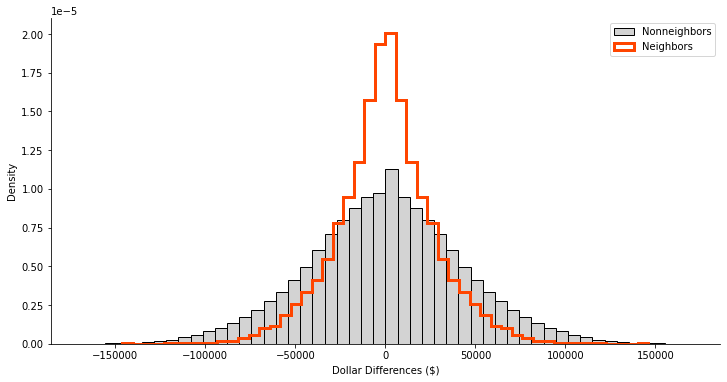

In [169]:
f = plt.figure(figsize=(12,6))
plt.hist(non_neighboring_diffs, color='lightgrey', 
         edgecolor='k', density=True, bins=50, label='Nonneighbors')
plt.hist(adjlist_wealth['diff'], 
         color='salmon', edgecolor='orangered', 
         linewidth=3, density=True, 
         histtype='step', bins=50, label='Neighbors')
seaborn.despine()
plt.ylabel("Density")
plt.xlabel("Dollar Differences ($)")
plt.legend()

A partir de esto, podemos ver que las dos distribuciones son distintas, siendo la distribución de la diferencia en los tramos no vecinos un poco más dispersa que la de los tramos vecinos . Por lo tanto, en general, esto significa que las áreas vecinas tienen diferencias más pequeñas en riqueza que las áreas no vecinas.

Esto es consistente con el comportamiento del que hablaremos en capítulos posteriores sobre la **autocorrelación espacial**, la tendencia a que las observaciones sean estadísticamente más similares a las observaciones cercanas que a las distantes.

In [170]:
extremes = adjlist_wealth.sort_values('diff', ascending=False).head(10)
extremes

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
2605,473,163,1.0,183929.0,37863.0,146066.0
2609,473,157,1.0,183929.0,64688.0,119241.0
1886,343,510,1.0,151797.0,38125.0,113672.0
2610,473,238,1.0,183929.0,74485.0,109444.0
54,8,89,1.0,169821.0,66563.0,103258.0
1888,343,120,1.0,151797.0,54910.0,96887.0
2022,368,438,1.0,139938.0,47083.0,92855.0
1885,343,338,1.0,151797.0,59459.0,92338.0
2594,471,163,1.0,126970.0,37863.0,89107.0
725,127,604,1.0,150391.0,62951.0,87440.0


Por lo tanto, vemos esa observación 473 aparece a menudo en el focal lateral, lo que sugiere que es bastante distinto de sus polígonos cercanos. 

También vemos la observación 343 a menudo en la columna focal.

Para verificar si estas diferencias son realmente inmensas, podemos utilizar una **estrategia de asignación al azar de mapas.**

En este caso, barajamos el mapa y calculamos nuevas columnas diff. Pero, esta vez, diff representa la diferencia entre vecinos aleatorios, en lugar de la estructura de vecinos que observamos, codificada en nuestra matriz de contigüidad de Rook. Utilizando muchos vectores diff, podemos encontrar las diferencias observadas que tienden a ser mucho mayores que las encontradas en mapas de ingresos familiares dibujados al azar.

Entonces, para empezar construimos muchos vectores diff aleatorios:

In [171]:
n_simulations = 1000
simulated_diffs = numpy.empty((len(adjlist), n_simulations))
for i in range(n_simulations):
    median_hh_focal = adjlist_wealth['median_hh_income_focal'].values
    random_wealth = san_diego_tracts[['median_hh_income']].sample(frac=1, replace=False).reset_index()
    adjlist_random_wealth = adjlist.merge(random_wealth, left_on='focal', right_index=True)\
                                   .merge(random_wealth, left_on='neighbor', right_index=True, 
                                          suffixes=('_focal','_neighbor'))
    simulated_diffs[:,i] = adjlist_random_wealth['median_hh_income_focal'] - adjlist_random_wealth['median_hh_income_neighbor']

Después de ejecutar nuestras simulaciones, obtenemos muchas distribuciones de diferencias por pares en los ingresos familiares. 

A continuación, podemos ver el velo de todas las diferencias simuladas, que se muestran en negro, y nuestras diferencias observadas, que se muestran en rojo:

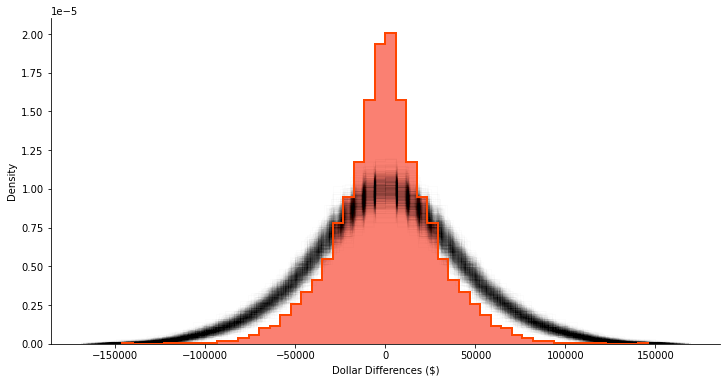

In [173]:
f = plt.figure(figsize=(12,6))
plt.hist(adjlist_wealth['diff'], 
         color='salmon', bins=50, density=True,
         alpha=1, linewidth=4)
[plt.hist(simulation, histtype='step', 
         color='k', alpha=.01, linewidth=1, 
         bins=50, density=True) for simulation in simulated_diffs.T]
plt.hist(adjlist_wealth['diff'], histtype='step', 
         edgecolor='orangered', bins=50, density=True,
         linewidth=2)
seaborn.despine()
plt.ylabel("Density")
plt.xlabel("Dollar Differences ($)")
plt.show()

Nuevamente, nuestra distribución aleatoria está mucho más dispersa que nuestra distribución observada de las diferencias entre los tramos cercanos. 

Empíricamente, podemos agrupar nuestras simulaciones y construir y usar sus cuantiles para resumir cuán improbable es cualquiera de nuestras diferencias observadas si los ingresos de los hogares de los vecinos se asignaron al azar:

In [174]:
pooled_diffs = simulated_diffs.flatten()
lower, median, upper = numpy.percentile(pooled_diffs, q=(.5,50,99.5))
outside = (adjlist_wealth['diff'] < lower) | (adjlist_wealth['diff'] > upper)

Entonces, a pesar del hecho de que nuestras diferencias observadas están menos dispersas en promedio, podemos identificar tres límites en los datos que se encuentran en el 1% superior de las diferencias más extremas en los ingresos de los hogares vecinos en todo el mapa. Estos límites se muestran en la siguiente tabla:

In [175]:
adjlist_wealth[outside]

,focal,neighbor,weight,median_hh_income_focal,median_hh_income_neighbor,diff
885,157,473,1.0,64688.0,183929.0,-119241.0
915,163,473,1.0,37863.0,183929.0,-146066.0
2605,473,163,1.0,183929.0,37863.0,146066.0
2609,473,157,1.0,183929.0,64688.0,119241.0


Hay que tener en cuenta que uno de estos, la observación **473**, aparece en ambos límites. Esto significa que es probable que **la observación sea periférica**, extremadamente diferente a todos sus vecinos. 

Este tipo de comparaciones de vecindad generalizadas se discuten en el capítulo siguiente sobre autocorrelación espacial local.

Sin embargo, es más útil visualizar esto en un mapa, enfocándose en los dos límites alrededor de la observación. 473, que se muestra también en el contexto más amplio de los ingresos de San Diego:

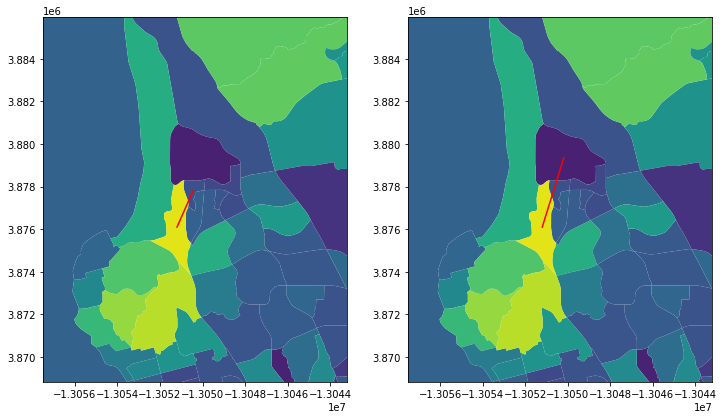

In [192]:
f,ax = plt.subplots(1, 2, figsize=(12,8))

# Plot tracts
for i in range(2):
    san_diego_tracts.plot('median_hh_income', ax=ax[i])
# Zoom 2
second_focus = san_diego_tracts.iloc[[473,163]]
ax[1].plot(second_focus.centroid.x, second_focus.centroid.y, color='red')
west,east,south,north = second_focus.buffer(5000).total_bounds
ax[1].axis([west, south, east, north])

# Zoom 1
#first_focus = san_diego_tracts.iloc[[473,157]]
ax[0].plot(first_focus.centroid.x, first_focus.centroid.y, color='red')
west,east,south,north = second_focus.buffer(5000).total_bounds
ax[0].axis([west, south, east, north])

plt.show()

Estos son los contrastes más marcados en el mapa y dan como resultado las divisiones más distintivas entre los ingresos familiares de las áreas adyacentes.